In [ ]:
!pip install GeoPandas
import geopandas
import pandas as pd
!pip install contextily
import contextily as ctx

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 37.0 MB/s 
     |████████████████████████████████| 15.4 MB 39.3 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
# caricare il geodataframe delle piste ciclabili bike_ciclabili.zip

In [ ]:
bikes=geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/bike_ciclabili/bike_ciclabili.dbf")
bikes

id_amat  ...                                           geometry
0        9001  ...  LINESTRING (9.18700 45.48095, 9.18696 45.48085...
1        9002  ...  LINESTRING (9.24192 45.43931, 9.24202 45.43939...
2        9003  ...  LINESTRING (9.23979 45.43996, 9.23991 45.43998...
3        9004  ...    LINESTRING (9.23902 45.44251, 9.23898 45.44256)
4        9005  ...  LINESTRING (9.23990 45.43999, 9.23985 45.44009...
...       ...  ...                                                ...
3160    12932  ...    LINESTRING (9.14977 45.46021, 9.14979 45.46024)
3161    12933  ...    LINESTRING (9.14966 45.46050, 9.14972 45.46057)
3162    12934  ...    LINESTRING (9.14963 45.46046, 9.14966 45.46050)
3163    12935  ...    LINESTRING (9.14957 45.46039, 9.14963 45.46046)
3164    12936  ...    LINESTRING (9.14954 45.46035, 9.14957 45.46039)

[3165 rows x 11 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# visualizzare il geodataframe

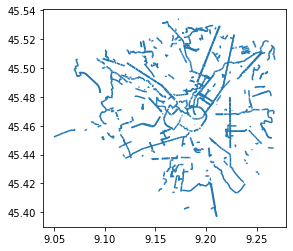

In [ ]:
bikes.plot()

In [ ]:
# caricare il geodataframe dei quartieri ds964_nil_wm.zip

In [ ]:
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf')
quartieri

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

In [ ]:
# visualizza la mappa dei quartieri e delle piste ciclabili

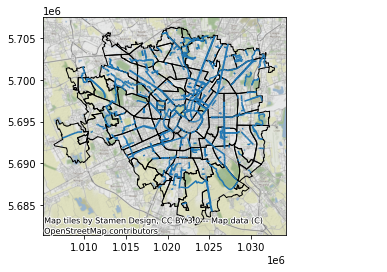

In [ ]:
ax = quartieri.to_crs(epsg=3857).plot(edgecolor='k', facecolor='none')
bikes.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)

In [ ]:
# creare una geoserie con le informazioni sulla ciclabile di via Melchiorre Gioia e visualizzarla

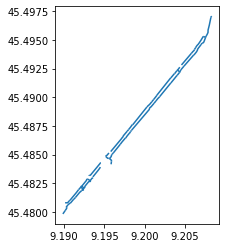

In [ ]:
melchiorre_gioia = bikes[bikes.anagrafica == 'VIA MELCHIORRE GIOIA']

melchiorre_gioia.plot()

In [ ]:
# trovare tutti i quartieri attraversati da questa pista ciclabile

In [ ]:
quartieri[quartieri.intersects(melchiorre_gioia.unary_union)]

ID_NIL  ...                                           geometry
8       11  ...  POLYGON ((9.20116 45.48963, 9.20086 45.48938, ...
17      13  ...  POLYGON ((9.21220 45.50971, 9.21224 45.50922, ...
56      12  ...  POLYGON ((9.18489 45.50554, 9.18724 45.50518, ...
68       9  ...  POLYGON ((9.19871 45.48484, 9.19836 45.48389, ...
72      10  ...  POLYGON ((9.21836 45.49970, 9.21877 45.49951, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...

[6 rows x 9 columns]

In [ ]:
melchiorre_gioia.geometry.squeeze()

213     LINESTRING (9.19121 45.48112, 9.19123 45.48113...
266     LINESTRING (9.19590 45.48496, 9.19589 45.48493...
292     LINESTRING (9.19814 45.48687, 9.19811 45.48684...
295     LINESTRING (9.20092 45.48961, 9.20073 45.48945...
296     LINESTRING (9.20406 45.49191, 9.20403 45.49187...
                              ...                        
1659    LINESTRING (9.19558 45.48514, 9.19533 45.48493...
1664    LINESTRING (9.19854 45.48762, 9.19849 45.48761...
1680      LINESTRING (9.19585 45.48416, 9.19589 45.48440)
1738      LINESTRING (9.19289 45.48287, 9.19283 45.48286)
1793      LINESTRING (9.19076 45.48075, 9.19121 45.48112)
Name: geometry, Length: 69, dtype: geometry

In [ ]:
# visualizzare su una mappa la pista ciclabile e i quartieri attraversati (utilizzare i colori presenti nell'esempio)

In [ ]:
quartieri[quartieri.intersects(melchiorre_gioia.unary_union)]

ID_NIL  ...                                           geometry
8       11  ...  POLYGON ((9.20116 45.48963, 9.20086 45.48938, ...
17      13  ...  POLYGON ((9.21220 45.50971, 9.21224 45.50922, ...
56      12  ...  POLYGON ((9.18489 45.50554, 9.18724 45.50518, ...
68       9  ...  POLYGON ((9.19871 45.48484, 9.19836 45.48389, ...
72      10  ...  POLYGON ((9.21836 45.49970, 9.21877 45.49951, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...

[6 rows x 9 columns]

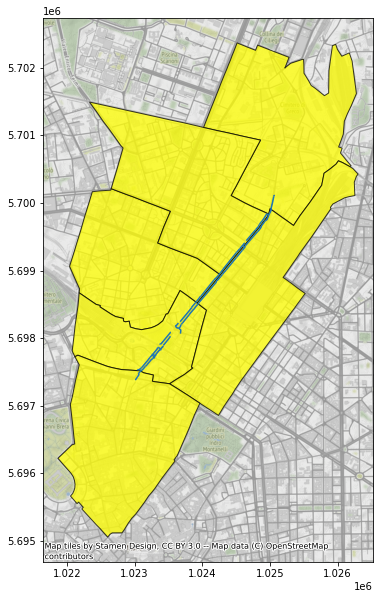

In [ ]:
ax = quartieri[quartieri.intersects(melchiorre_gioia.unary_union)].to_crs(epsg=3857).plot(alpha=0.75,facecolor='yellow',edgecolor='k',figsize=(15,10))
melchiorre_gioia.to_crs(epsg=3857).plot(ax=ax, facecolor='b')
ctx.add_basemap(ax)

In [ ]:
# caricare il geodataframe delle fontanelle Fontanelle.zip

In [ ]:
fontanelle = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Fontanelle.zip')
fontanelle

Fonte  ...                            geometry
0   © OpenStreetMap contributors - OSM  ...  POINT Z (9.16165 45.47091 0.00000)
1   © OpenStreetMap contributors - OSM  ...  POINT Z (9.23184 45.46831 0.00000)
2   © OpenStreetMap contributors - OSM  ...  POINT Z (9.14380 45.48017 0.00000)
3   © OpenStreetMap contributors - OSM  ...  POINT Z (9.14401 45.48319 0.00000)
4   © OpenStreetMap contributors - OSM  ...  POINT Z (9.11746 45.49320 0.00000)
..                                 ...  ...                                 ...
77  © OpenStreetMap contributors - OSM  ...  POINT Z (9.22943 45.47751 0.00000)
78  © OpenStreetMap contributors - OSM  ...  POINT Z (9.22730 45.47965 0.00000)
79  © OpenStreetMap contributors - OSM  ...  POINT Z (9.22773 45.47728 0.00000)
80  © OpenStreetMap contributors - OSM  ...  POINT Z (9.22815 45.47994 0.00000)
81  © OpenStreetMap contributors - OSM  ...  POINT Z (9.15540 45.47531 0.00000)

[82 rows x 3 columns]

In [ ]:
# visualizzare il geodataframe su una mappa

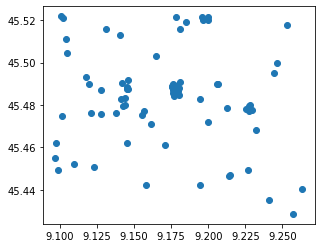

In [ ]:
fontanelle.plot()

In [ ]:
# visualizzare su una mappa le fontanelle e i quartieri in cui si trovano.
# non visualizzare i quartieri in cui non ci sono fontanelle

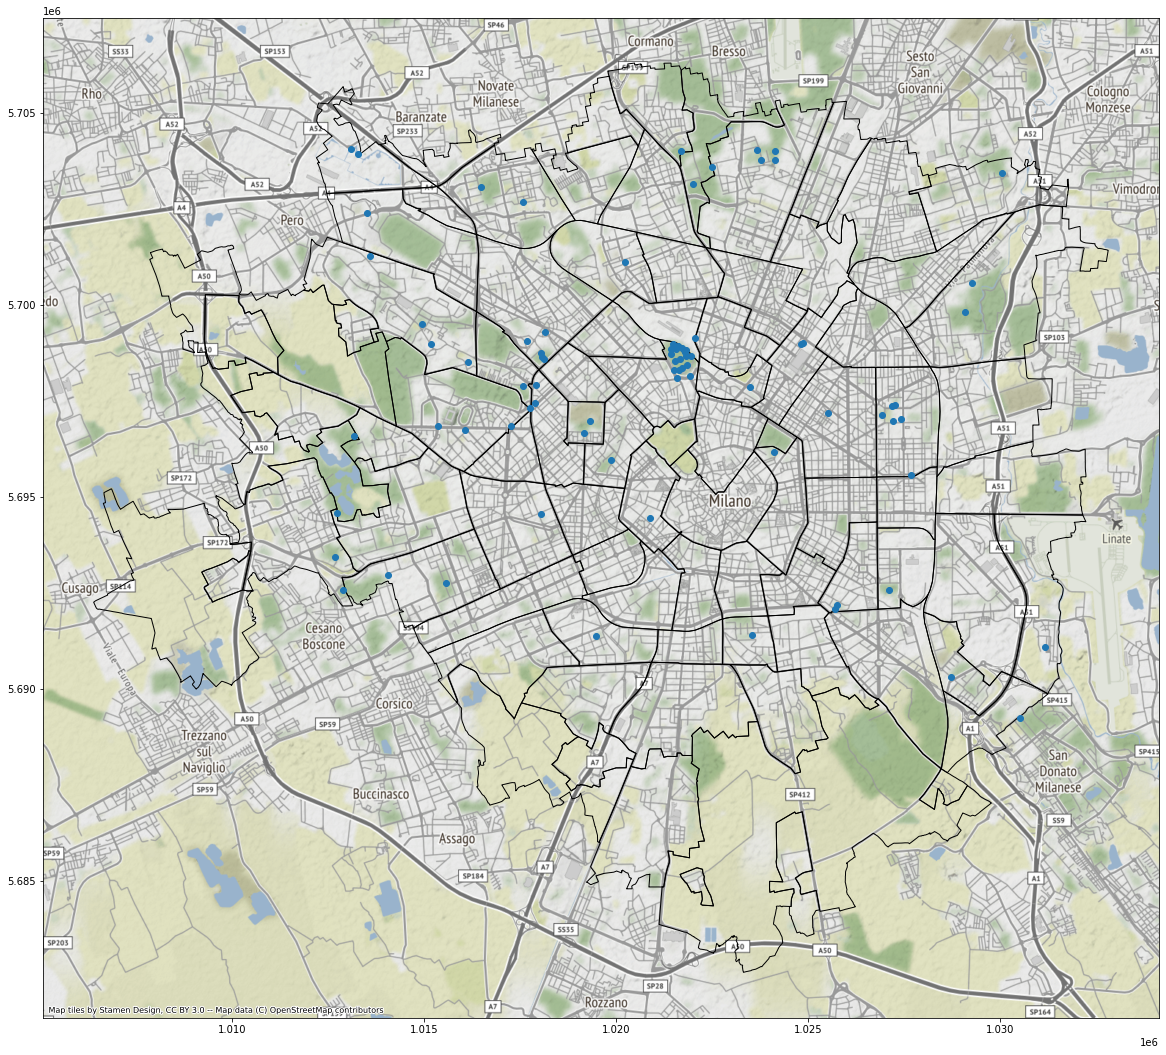

In [ ]:
ax = quartieri.to_crs(epsg=3857).plot(edgecolor='k', facecolor='none',figsize=(20,20))
fontanelle.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)

In [ ]:
# colorare i quartieri in modo proporzionale al numero di fontanelle presenti (giallo molte fontanelle, blu scuro poche fontanelle)
# non evidenziare i quartieri senza fontanelle
quartieri['1']= fontanelle[fontanelle.intersects(quartieri)]

/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


ValueError: ignored

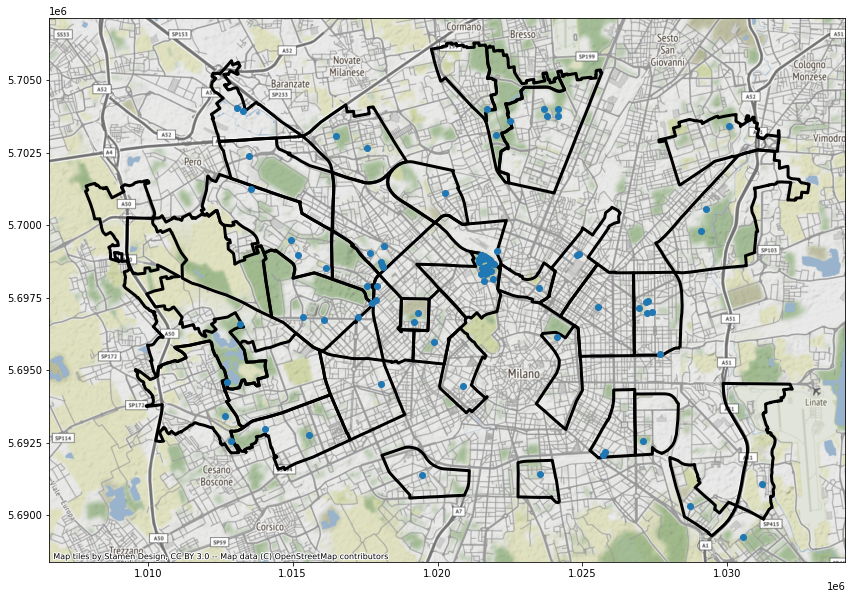

In [ ]:
ax = quartieri[quartieri.intersects(fontanelle.unary_union)].to_crs(epsg=3857).plot(linewidth=3,edgecolor='k',facecolor='none', figsize=(15,10))
fontanelle.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)

KeyError: ignored

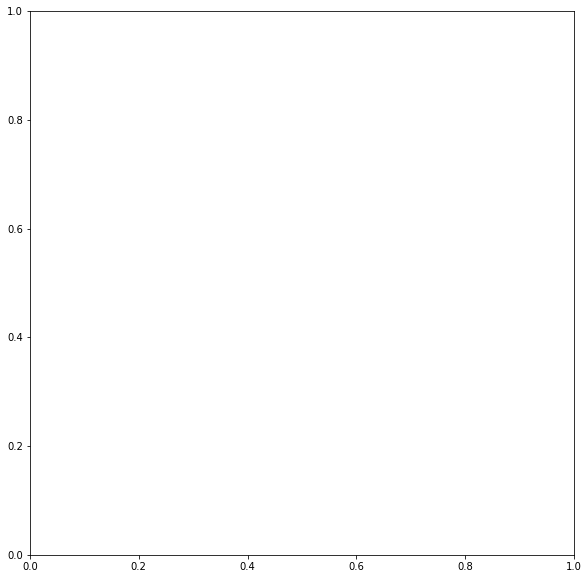

In [ ]:
ax = quartieri.to_crs(epsg=3857).plot(column='fontanelle',legend=True,linewidth=3,edgecolor='k',facecolor='none', figsize=(15,10))
fontanelle.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)

In [ ]:
# visalizzare la mappa precedente facendo in modo che i quartieri con fontanelle siano colorati con gradazioni di rosso
# e quelli senza fontanelle con gradazioni di grigio